In [285]:
# Do some exploratory analyses on IPEDS dataset 
# 
# Plot1: Aggregated distribution of retention rate and graduattion rate
#        -> Graduation rate distribution looks funny. Focus on retention rate for now 
#
# Plot2: Retention rate as a function of academic year 
#        -> Looks really stable around 0.7. Focus on the year 2012
#
# Plot3: Average retention rate (2012) as a function of sector: Public, Private-Non-Profit, Private-For-Profit
#        -> Private-For-Profit has a lower rate (confirming a known trend)
#
# Plot4: Distribution of retention rate (2012) by sector
#
# Plot5: Retention rate vs. Total expenses (2012) by sector
#        -> Clear dependency between the two variables for Public/Private-Non-Profit; Not so for Private-For-Profit  
#
# Plot6: The same as Plot5 but gave a diffent subplot to each sector for visibility  
#        (For a starter, I did linear regression, but it does not really make sense 
#         to have the retention rate as the dependent variable because it's bounded in [0 1])
#
# Plot7: (nonpara) correlation between retention rate and total expenses
#        Strong correlaitons (0.6, 0.45) for Public, and Private-Non-Profit, respectively
#        Zero correaltion for Private-For-Profit 
#
# 
# Current take-home:
# 1. Strong positive relationship between retention rate and expenses for Public and Private-Non-Profit institutes  
# 2. Private-For-Profit group is really differnet from the other two groups:
#    Not only their retention rate is markedly lower, there is no relationship between the rate and expenses...
#
# 2021-07-10 TakaDoi Created 
# 2021-07-12 TakaDoi Done for now 

In [286]:
%reset -f

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from datahandler import setup_ipeds_datasets as sid

from importlib import reload
reload(sid)

sns.set_theme()
sns.set_context('paper')

In [287]:
b_save_figures = True
# b_save_figures = False

if b_save_figures:
    home_loc = os.path.expanduser('~')
    dir_name = home_loc + '/Dropbox/Data/IPEDS/'
    
    if not os.path.isdir(dir_name):
        dir_name = '' 

In [288]:
print(dir_name)

/Users/takahirodoi/Dropbox/Data/IPEDS/


In [289]:
# Load a csv into DataFrame 
d = sid.SetupIPEDSData()
df = d.print_data_path()

loading:
~/Dropbox/Data/IPEDS/IPEDS_Analytics_DCP_87_12_CSV/delta_public_00_12.csv


In [290]:
df = d.get_data()

In [291]:
# Preprocess 
# Graduate pecentage -> Graduation rate 
df['grad_rate_150_p'] = df['grad_rate_150_p'] * 0.01;

In [292]:
df.head(10)

,groupid,academicyear,unitid,instname,zip,sector,sector_revised,any_aid_num,any_aid_pct,tuitionfee02_tf,...,applcn,applcnm,applcnw,admssn,ft_faculty_per_100fte,total_faculty_all,all_employees,ft_faculty_salary,full_time_employee_100fte,missing_ret
0,-475291,2012,475291,Brown College-Brooklyn Center,55430,3,3,12.0,100.0,17100.0,...,NaN,NaN,NaN,NaN,0.636943,3.0,13.0,42956.000000,7.006369,False
2,-475273,2012,475273,Springfield College-School of Human Services,01109,2,2,NaN,NaN,13932.0,...,NaN,NaN,NaN,NaN,1.685067,325.0,396.0,67586.793103,5.810575,True
5,-475237,2012,475237,The University of America,92563,2,2,NaN,NaN,2500.0,...,NaN,NaN,NaN,NaN,51.851852,14.0,17.0,NaN,62.962963,False
6,-475200,2012,475200,Whitworth University-Adult Degree Programs,99251,2,2,NaN,NaN,11160.0,...,NaN,NaN,NaN,NaN,3.954802,55.0,68.0,46803.714286,10.734463,True
8,-475185,2012,475185,Rio Grande Bible Institute,78539-9650,2,2,0.0,0.0,1734.0,...,49.0,32.0,17.0,25.0,NaN,NaN,15.0,NaN,6.481481,False
12,-475121,2012,475121,South University�Savannah Online,31406,3,3,2768.0,74.0,13567.0,...,10930.0,3097.0,7833.0,7409.0,0.589957,1539.0,1981.0,51627.872180,2.550568,False
17,-475042,2012,475042,Brown Mackie College-Oklahoma City,73132,3,3,52.0,98.0,10800.0,...,NaN,NaN,NaN,NaN,NaN,7.0,26.0,NaN,19.354839,True
18,-475033,2012,475033,Relay Graduate School of Education,10011,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.428571,35.0,64.0,79774.500000,55.952381,True
22,-474979,2012,474979,University of Phoenix-Shreveport-Bossier,71111-4390,3,3,24.0,100.0,10234.0,...,NaN,NaN,NaN,NaN,NaN,3.0,22.0,NaN,5.555556,True
23,-474960,2012,474960,University of Phoenix-Lafayette,70508-3295,3,3,18.0,90.0,10234.0,...,NaN,NaN,NaN,NaN,NaN,2.0,24.0,NaN,6.853583,True


In [293]:
# Loaded variables (modify the setup class method if you want to add more variables to the analysis)
df.columns.values.tolist()

['groupid',
 'academicyear',
 'unitid',
 'instname',
 'zip',
 'sector',
 'sector_revised',
 'any_aid_num',
 'any_aid_pct',
 'tuitionfee02_tf',
 'acadsupp01',
 'total01',
 'eandg01_sum',
 'liabilities07',
 'assets11',
 'grad_rate_150_p',
 'grscohort',
 'ftretention_rate',
 'ptretention_rate',
 'fall_cohort_num',
 'fall_cohort_pct',
 'fall_cohort_num_indistrict',
 'fall_cohort_pct_indistrict',
 'fall_cohort_num_instate',
 'fall_cohort_pct_instate',
 'fall_cohort_num_outofstate',
 'fall_cohort_pct_outofstate',
 'fall_cohort_num_resunknown',
 'fall_cohort_pct_resunknown',
 'fall_total_undergrad',
 'year_cohort_num',
 'total_enrollment_amin_tot',
 'total_enrollment_asian_tot',
 'total_enrollment_black_tot',
 'total_enrollment_hisp_tot',
 'total_enrollment_white_tot',
 'total_enrollment_multi_tot',
 'total_enrollment_unkn_tot',
 'total_enrollment_nonres_tot',
 'applcn',
 'applcnm',
 'applcnw',
 'admssn',
 'ft_faculty_per_100fte',
 'total_faculty_all',
 'all_employees',
 'ft_faculty_salary',


In [294]:
# See which years you got
print(df.academicyear.unique())

['2012' '2011' '2010' '2009' '2008' '2007' '2006' '2005' '2004' '2003'
 '2002' '2001' '2000']


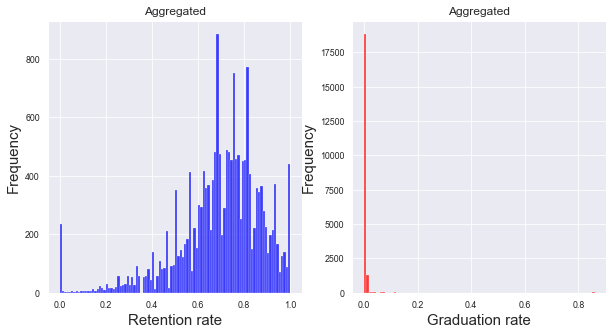

In [295]:
# Retention rate and Graduation rate (aggregate distributions)
# Graduation rate data are suspicious--I suepect many inputs are actually fraction value not percent values...
# --> Focus on retention rate 

list_vars   = ['ftretention_rate', 'grad_rate_150_p']
list_colors = ['blue','red']
list_names  = ['Retention rate','Graduation rate']

fig, axs = plt.subplots(1,2)
fig.set_size_inches(10, 5)

for i, ax in enumerate(axs):
    plt.sca(ax)
    tmp_var   = list_vars[i] 
    tmp_color = list_colors[i] 
    tmp_name  = list_names[i] 
    
    sns.histplot(df[tmp_var], color=tmp_color, bins=100)
    plt.xlabel(tmp_name, fontsize=15)
    plt.ylabel('Frequency', fontsize=15)
    plt.title('Aggregated', fontsize=12)
    # ax.tick_params(direction='out',length=10, width=10, grid_color='k')
    # plt.xlim([0, 0.1])

plt.savefig(dir_name+'aggregated.pdf')
plt.show()

In [296]:
t = ax.minorticks_on

In [297]:
# See if retention rate is changing bewteen 2012 and 2020
# Average and SD: retention rate for each year 
gr_year = df.groupby('academicyear')
rt_stats = gr_year['ftretention_rate'].agg([np.mean, np.std, np.size])
rt_stats

,mean,std,size
academicyear,,,
2000,NaN,NaN,2750.0
2001,NaN,NaN,2763.0
2002,NaN,NaN,2797.0
2003,NaN,NaN,2538.0
2004,0.703312,0.202634,2454.0
2005,0.706700,0.177648,2453.0
2006,0.703605,0.169385,2501.0
2007,0.699892,0.170556,2495.0
2008,0.697245,0.177419,2530.0


In [298]:
# type(rt_stats)

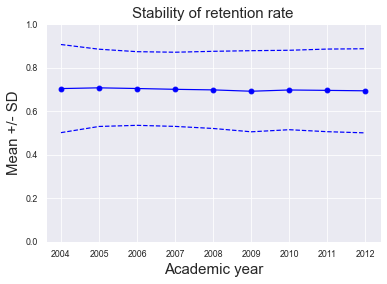

In [299]:
# Retention rate against academic year (mean+/-std)
# --> looks really stable  
m = rt_stats['mean']
m_pl_sd = rt_stats['mean'] + rt_stats['std']
m_mi_sd = rt_stats['mean'] - rt_stats['std']

# ax = sns.lineplot(data=m)
# sns.lineplot(data=m_pl_sd)
# sns.lineplot(data=m_mi_sd)

x = m.index
y = m.values
plt.plot(x,y,'o-',color='blue')

y = m_pl_sd.values
plt.plot(x,y,'--', color='blue')

y = m_mi_sd.values
h = plt.plot(x,y,'--',color='blue')

plt.ylim([0, 1])

plt.xlabel('Academic year', fontsize=15)
plt.ylabel('Mean +/- SD', fontsize=15)
plt.title('Stability of retention rate', fontsize=15)

plt.show()

In [300]:
# Analyze 2012 
df2012 = df[df.academicyear == '2012']
df2012.shape

(2756, 49)

In [301]:
# what's happening in grad_date_150_p data... so low...
df2012.grad_rate_150_p.isnull().sum()
df2012.grad_rate_150_p.describe()

count    1961.000000
mean        0.005000
std         0.002156
min         0.000064
25%         0.003460
50%         0.005000
75%         0.006471
max         0.010000
Name: grad_rate_150_p, dtype: float64

In [302]:
# Sector
sector_dic = {'1':'Public', '2':'Private non profit', '3':'Private for profit'} 
print('Unique sector values:')
print(df2012['sector_revised'].unique())

Unique sector values:
['3' '2' '1']


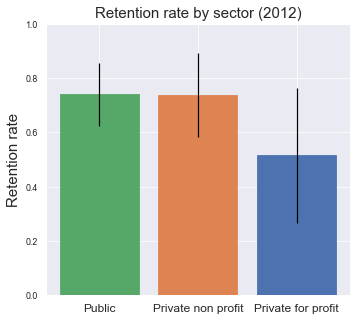

In [303]:
# Average retention rate and graduatiton rate by sector
# (hide graduation rate to focus on retention rate)
gr_sector = df2012.groupby('sector_revised')

list_vars   = ['ftretention_rate', 'grad_rate_150_p']
list_colors = ['blue','red'] # retention rate and graduation rate colors
list_names  = ['Retention rate','Graduation rate']
list_ylims  = [[0, 1], [0, 0.01]] 
handles_bar = [] 

fig, axs = plt.subplots(1,2)
fig.set_size_inches(12, 5)

for i, ax in enumerate(axs):
    plt.sca(ax)
    tmp_var   = list_vars[i] 
    tmp_color = list_colors[i] 
    tmp_name  = list_names[i] 
    tmp_ylim  = list_ylims[i] 

    rt_stats2 = gr_sector[tmp_var].agg([np.mean, np.std, np.size])

    x = rt_stats2.index
    y = rt_stats2['mean']

    h_b = plt.bar(x,y, color=tmp_color)
    handles_bar.append(h_b)

    yerr = rt_stats2['std']
    for i in range(3):
        plt.errorbar(x[i], y[i], yerr[i], marker='s', mfc='black', ecolor='black',
                 mec='black', ms=0, mew=20)


    plt.ylim(tmp_ylim)
    plt.title(tmp_name +' by sector (2012)', fontsize=15)
    plt.ylabel(tmp_name, fontsize=15)
    tmp = sector_dic.values()
    ax.set_xticks(x)
    ax.set_xticklabels(list(tmp))
    ax.tick_params(axis='x', labelsize=12)
    
    
# Post-hoc    
# For now, just show retention rate
axs[1].set_visible(False)
# Match bar colors to the rest of the figures  
list_colors = ['C2','C1','C0']
for i in range(3):
    handles_bar[0][i].set_color(list_colors[i])
    
plt.savefig(dir_name+'mean_by_sector.pdf')
plt.show()

In [304]:
# vars(handles_bar[0][0])


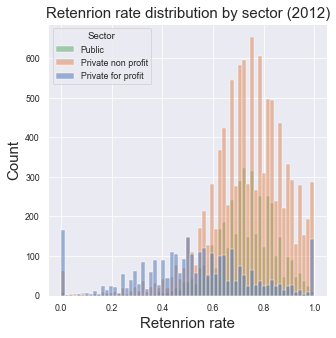

In [305]:
# Retention rate distribution (2012) by sector
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

# Retention rate distribution 
sns.histplot(df, x="ftretention_rate", hue="sector")

# Somehow get_legend_handles_labels() return empty 
# handles, labels = ax.get_legend_handles_labels()
# new_labels = [sector_dic[k] for k in labels]
# ax.legend(handles, new_labels, title='Sector')

plt.ylabel('Count', fontsize=15)
plt.xlabel('Retenrion rate', fontsize=15)
plt.title('Retenrion rate distribution by sector (2012)', fontsize=15)


ax.legend(sector_dic.values(), title='Sector')
plt.show()


In [306]:
# sector_dic.values()

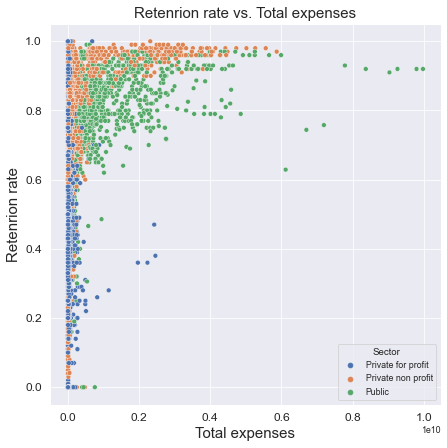

In [307]:
# Exploratroy analysis on what explains the variability in retention rate among institutes 
# 
# I picked **Total expensense** as a candidate variable
# Hypo: if an institution spends more money, its students will come back to the campus more? 
#       (obviously there are some confouding vaiables, but let's start simple) 
# 
# Results:
# Looks like retenriaon rate depnds on total expenses. 
# 
# --List of variables of interest--
#  "grad_rate_150_p",
#  "all_employees",
#  "ft_faculty_salary",
#  "full_time_employee_100fte",
#  "sector",
#  "sector_revised",
#  "zip",
#  "instname",
#  "grscohort",
#  "fall_cohort_num_indistrict",
#  "fall_cohort_pct_indistrict",
#  "fall_cohort_num_instate",
#  "fall_cohort_pct_instate",
#  "year_cohort_num",
#  "applcn",
#  "applcnm",
#  "applcnw",
#  "admssn",
#  "ft_faculty_per_100fte",
#  "total_faculty_all",
#  "total01" <--------------- Picked (Total expenses) 

fig, ax = plt.subplots()
fig.set_size_inches(7, 7)
sns.scatterplot(data=df, x='total01',y='ftretention_rate',hue='sector')

handles, labels = ax.get_legend_handles_labels()
new_labels = [sector_dic[k] for k in labels]
ax.legend(handles, new_labels, title='Sector')

plt.xlabel('Total expenses', fontsize=15)
plt.ylabel('Retenrion rate', fontsize=15)
plt.title('Retenrion rate vs. Total expenses', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [308]:
# Linear regression in each sector 
# (But I abandoned this...) 
from sklearn.linear_model import LinearRegression

# To use dropna, make a smaller dataframe
df2 = df[['ftretention_rate','total01','sector']]
df2 = df2.dropna() # You have to pass this to self! 
gr_sector2 = df2.groupby('sector')

linear_regressors = [] 
sectors = []
Xs = [] 
Ys = [] 
Ps = [] # Pred 

for sector, group in gr_sector2:
    X = group.total01.values.reshape(-1,1)
    Y = group.ftretention_rate.values.reshape(-1,1)
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X,Y)
    P = linear_regressor.predict(X)
    linear_regressors.append(linear_regressor)
    sectors.append(sector)
    Xs.append(X)
    Ys.append(Y)
    Ps.append(P)

In [309]:
# sectors 

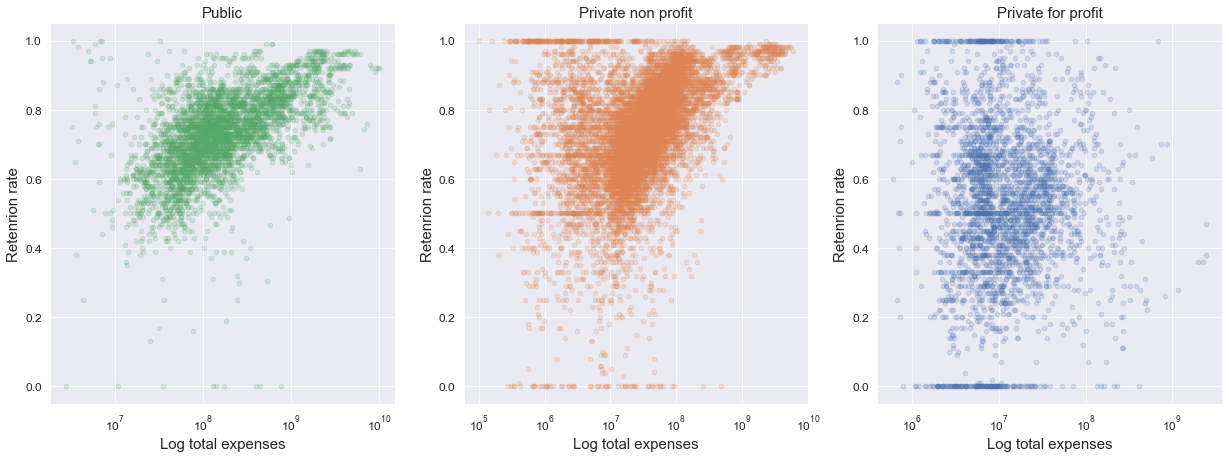

In [310]:
# For now, just repeat the plot above but in different subplots for different sectors 
fig, axs = plt.subplots(1,3)
fig.set_size_inches(21, 7)

list_colors = ['C2','C1','C0']
for i, sector in enumerate(sectors):
    X = Xs[i]
    Y = Ys[i]
    P = Ps[i]
    a = axs[i]
    c = list_colors[i]
    plt.sca(a)
    plt.scatter(X, Y, alpha=0.2, color=c)
    # plt.plot(X, P, linewidth=3, color='black')
    
    plt.title(sector_dic[sector], fontsize=15)
    plt.xlabel('Log total expenses', fontsize=15)
    plt.ylabel('Retenrion rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    a.set_xscale('log')
    
plt.savefig(dir_name+'retentionrate_vs_totalexpense.pdf')
plt.show()    

In [160]:
# Quantify the dependency with Spearman's correlation
from scipy.stats import spearmanr

spearman_r = []
spearman_p = []
handles_bar = [] 
sector_name = []
for i, sector in enumerate(sectors):
    X = Xs[i]
    Y = Ys[i]
    r, p = spearmanr(X, Y)
    spearman_r.append(r)
    spearman_p.append(p)
    sector_name.append(sector_dic[sector])

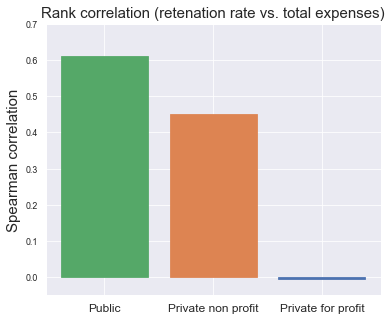

In [161]:
# Plot rank correlation values with bars 
fig, ax = plt.subplots()
fig.set_size_inches(6, 5)

x = range(3)
y = spearman_r
handles_bar = plt.bar(x,y)

plt.ylim([-0.05, 0.7])
plt.title('Rank correlation (retenation rate vs. total expenses)', fontsize=15)
plt.ylabel('Spearman correlation', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(sector_name)
ax.tick_params(axis='x', labelsize=12)
    
    
# Match bar colors to the rest of the figures  
list_colors = ['C2','C1','C0']
for i in range(3):
    handles_bar[i].set_color(list_colors[i])
    
plt.show()

In [162]:
# See how many institutes are included in the analysis for each sector
num_inst = [len(x) for x in Xs]
print('Number of analyzed institutes')
for i, n in enumerate(num_inst):
    print(f'{sector_name[i]:>18}',': ',num_inst[i])

Number of analyzed institutes
            Public :  4223
Private non profit :  10525
Private for profit :  3062
